In [1]:
import non_stationary_demo


### Fixed-parameter reversal-learning simulation
Simulate a tone-guided task with a Q-learning + softmax agent. A reversal is armed at **≥19/20** correct and executed **250 trials later**.


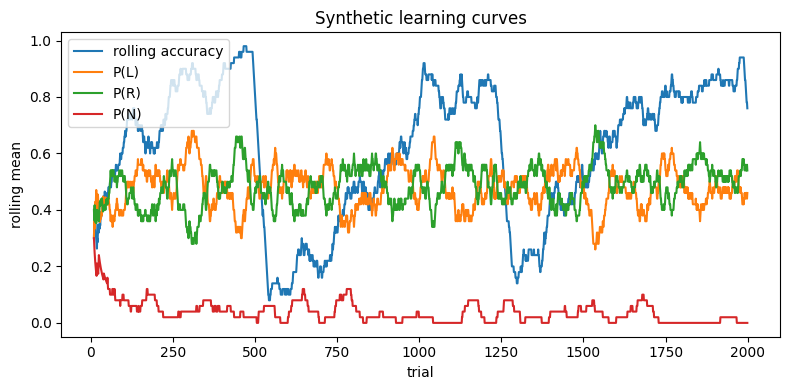

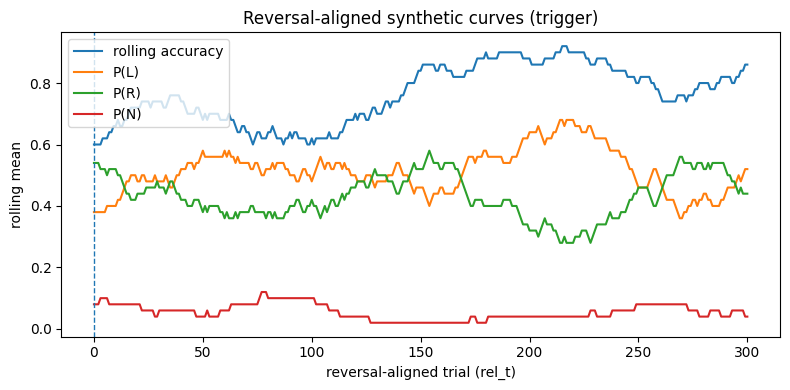

In [17]:
from non_stationary_demo import (
    AgentParams, TaskSpec, make_correct_pairs_from_reward_probs,
    simulate_reversal_session,
    plot_learning_curves, plot_reversal_aligned
)

states = ["6kHz", "10kHz"]
actions = ["L", "R", "N"]

reward_probs = {
    ("6kHz", "L"): 0.9, ("6kHz", "R"): 0.1, ("6kHz", "N"): 0.0,
    ("10kHz","L"): 0.1, ("10kHz","R"): 0.9, ("10kHz","N"): 0.0,
}
correct_pairs = make_correct_pairs_from_reward_probs(reward_probs)

task = TaskSpec(state_space=states, action_space=actions, reward_probs=reward_probs, correct_pairs=correct_pairs)
agent = AgentParams(alpha=0.01, beta=4.0, bias_L=0.0, bias_R=0.0, bias_N=-1.0)

df = simulate_reversal_session(
    seed=0,
    n_trials=2000,
    agent=agent,
    task=task,
    reversal_countdown=250,
    perf_window=20,
    perf_threshold=19,
)

fig1 = plot_learning_curves(df, window=50)
fig2 = plot_reversal_aligned(df, window=50, before=150, after=150)


### Dynamic-parameter reversal-learning simulation
Same tone-guided task, but **β(t)** and action biases **$b_L(t)$, $b_R(t)$, $b_N(t)$** evolve via random walks. We simulate a session and plot rolling choice probabilities and parameter trajectories, marking **all rule flips**.


In [10]:
from pathlib import Path

from non_stationary_demo.simulate import (
    AgentParams, TaskSpec, DynamicRWParams,
    make_correct_pairs_from_reward_probs,
    simulate_dynamic_reversal_session,
)

from non_stationary_demo.analysis import (
    plot_choice_prob_evolution,
    plot_dynamic_params,
    plot_dynamic_params_reversal_aligned,
    plot_bias_increment_drift_to_zero,
)


In [11]:
states = ["6kHz", "10kHz"]
actions = ["L", "R", "N"]

reward_probs = {
    ("6kHz", "L"): 0.9, ("6kHz", "R"): 0.1, ("6kHz", "N"): 0.0,
    ("10kHz","L"): 0.1, ("10kHz","R"): 0.9, ("10kHz","N"): 0.0,
}
correct_pairs = make_correct_pairs_from_reward_probs(reward_probs)

task = TaskSpec(
    state_space=states,
    action_space=actions,
    reward_probs=reward_probs,
    correct_pairs=correct_pairs,
)

agent = AgentParams(alpha=0.2, beta=4.0, bias_L=0.0, bias_R=0.0, bias_N=1)


In [12]:
rw = DynamicRWParams(
    mu_L=0.0, mu_R=0.0, mu_N=2e-4,
    sigma_L=0.02, sigma_R=0.02, sigma_N=1e-3,
    tau_bias=600.0,
    sigma_logbeta=0.01,
)

df = simulate_dynamic_reversal_session(
    seed=0,
    n_trials=3000,
    agent=agent,
    task=task,
    rw_params=rw,
    reversal_countdown=250,
    perf_window=20,
    perf_threshold=19,
)

df.head()


,t,state,action,reward,correct,rule,reversal_triggered,pi_L,pi_R,pi_N,beta_t,bias_L_t,bias_R_t,bias_N_t,d_bias_L,d_bias_R,d_bias_N,w_bias,reversal_t
0,0,10kHz,N,0,0,0,0,0.211942,0.211942,0.576117,4.000000,0.000000,0.000000,1.000000,-0.002648,0.002092,0.000556,1.000000,46
1,1,10kHz,N,0,0,0,0,0.211338,0.212342,0.576320,4.052502,-0.002648,0.002092,1.000556,-0.004520,-0.002910,0.007430,0.998335,46
2,2,10kHz,N,0,0,0,0,0.209813,0.211149,0.579038,4.043645,-0.007168,-0.000818,1.007986,-0.008069,0.000250,0.007819,0.996672,46
3,3,6kHz,N,0,0,0,0,0.207522,0.210589,0.581889,4.038451,-0.015237,-0.000568,1.015805,-0.014711,0.016662,-0.001951,0.995012,46
4,4,6kHz,N,0,0,0,0,0.204620,0.214261,0.581119,4.001398,-0.029948,0.016094,1.013854,0.004083,-0.004504,0.000420,0.993356,46


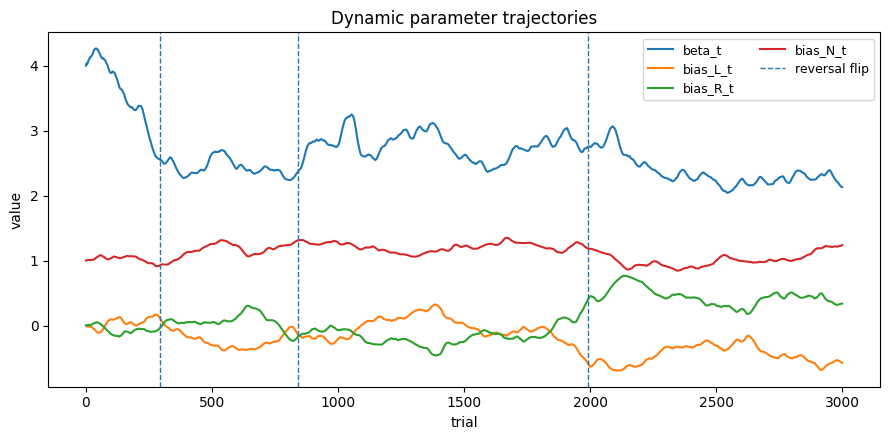

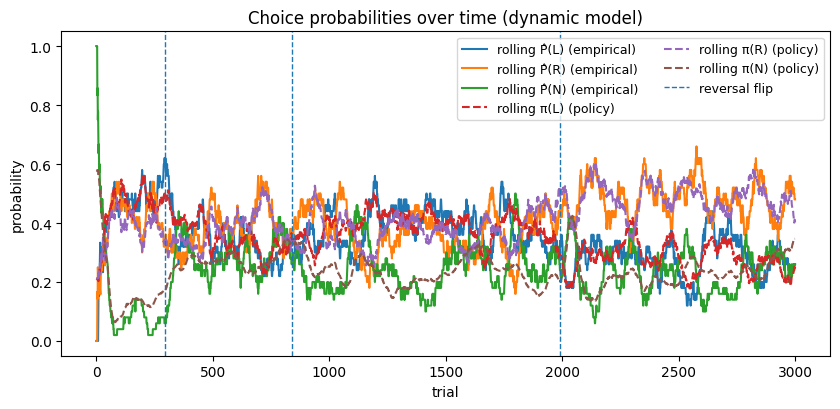

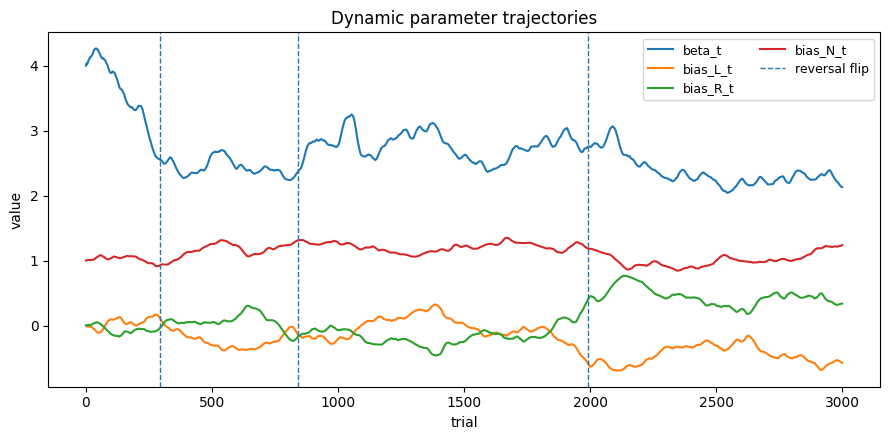

In [13]:
plot_choice_prob_evolution(df, window=50, reversals="all", reversal_kind="flip")
plot_dynamic_params(df, smooth_window=25, reversals="all", reversal_kind="flip")
